In [2]:
from matplotlib import pyplot as plt
import json
import numpy as np
np.set_printoptions(precision=3,suppress=True)

labels = {0:'l-jet',4:'c-jet',5:'b-jet',11:'elec',13:'muon',15:'tau',20:'bc-jet',40:'jet',50:'bkgd'}
comb_jets = False

x_labels_id = [0,11,50]
if comb_jets:
  x_labels_id = [40,11,13]
x_labels_str = [labels[i] for i in x_labels_id]
nlabels=len(x_labels_id)

# handle stupid colormap being too long
from mpl_toolkits.axes_grid1 import make_axes_locatable
def colorbar(mappable):
  ax = mappable.axes
  fig = ax.figure
  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="5%", pad=0.05)
  return fig.colorbar(mappable, cax=cax)

def combine_ljets(mat):
  # combines udsc-jet
  matA = np.sum(mat[0:2,...],axis=0)
  matB = np.array([matA,mat[2],mat[3],mat[4]])
  matC = np.sum(matB[...,0:2],axis=1)
  mat = np.array([matC,matB[...,2],matB[...,3],matB[...,4]]).transpose()
  return mat

def combine_jets(mat):
  # combines udsc-jet
  matA = np.sum(mat[0:3,...],axis=0)
  matB = np.array([matA,mat[3],mat[4]])
  matC = np.sum(matB[...,0:3],axis=1)
  mat = np.array([matC,matB[...,3],matB[...,4]]).transpose()
  return mat

In [9]:
'''mat = [[6333,17,1135,40],
[2784,12,884,6],
[2246,7,1387,2],
[28,0,1,5102]]'''
'''mat = [[6333,17,1135,40],
[2784,12, 884,6],
[2246,7,1387,2],
[28,0 ,1,5102]]'''
mat = """6741   0    761   23
3016   0   669    1
2452   1   1189  0
21        0   1        5109"""
# mat = mat.split()
# mat = [ [int(mat[i*4 + j]) for j in range(4)] for i in range(4)]

# 1820390_model_00008_00800
# matA = [[2163. ,1718. ,1008.,    5.],
#  [ 238.,  231.,  191.,    0.],
#  [1377., 1832., 2574.,    0.],
#  [  19.,    8.,    8., 3788.]]


matA = '''[[9.86446046e-01 3.89218818e-04 3.05306065e-06 0.00000000e+00 1.31616826e-02]
[2.55179784e-01 3.49297518e-01 2.77008015e-05 0.00000000e+00 3.95494997e-01]
[8.01053315e-02 5.06473017e-03 1.88320728e-02 0.00000000e+00 8.95997866e-01]
[8.72459147e-01 1.27540853e-02 0.00000000e+00 0.00000000e+00 1.14786768e-01]
[2.29724183e-02 1.38966323e-03 2.40840840e-05 0.00000000e+00 9.75613834e-01]]'''

matB = '''[[9.86943863e-01 2.46984106e-04 1.64711390e-05 0.00000000e+00 1.27926814e-02]
[1.99578331e-01 4.13390130e-01 1.50595930e-04 0.00000000e+00 3.86880943e-01]
[7.27434762e-02 7.21307823e-03 4.70288987e-02 0.00000000e+00 8.73014547e-01]
[7.45551601e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.54448399e-01]
[1.88007333e-02 1.23121168e-03 1.42439860e-04 0.00000000e+00 9.79825615e-01]]'''

matC = '''[[9.88801570e-01 1.61424800e-04 8.31515110e-06 1.40193448e-04
 1.08884963e-02]
[1.73410994e-01 4.32737863e-01 2.54716501e-05 4.39216152e-02
 3.49904057e-01]
[6.89699889e-02 4.70544646e-03 6.10781771e-02 6.42830678e-03
 8.58818081e-01]
[4.92919219e-01 8.58526856e-02 6.51564800e-03 8.17780311e-02
 3.32934416e-01]
[1.44259728e-02 7.71198234e-04 7.81725050e-05 1.58587409e-04
 9.84566069e-01]]'''

matD = '''[[142473.5, 6445.0, 1081.5, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0]]'''


matE = '''[[8.26716459e-01 2.65867458e-03 1.11480283e-01 5.91445840e-02]
[2.67135145e-01 5.81507603e-01 3.15540811e-03 1.48201844e-01]
[2.43061921e-01 7.41101902e-04 7.14188201e-01 4.20087762e-02]
[5.09358525e-01 4.44541558e-02 7.88291848e-02 3.67358134e-01]]'''

matF = '''[[0.99 0.002 0.008]
[0.102 0.749 0.149]
[0.055 0.024 0.921]]'''

matG = '''[[0.992 0.002 0.006]
[0.062 0.853 0.084]
[0.038 0.013 0.949]]'''

### new dataset
## pointnet++
matH = '''[[0.786 0.043 0.171]
[0.305 0.395 0.301]
[0.089 0.018 0.893]]'''

### GraphCNN
matJ = '''[[0.905 0.027 0.067]
[0.298 0.634 0.068]
[0.046 0.009 0.945]]'''

mat = matJ

mat = mat.replace('  ',' ',).replace(' ',', ')
mat = mat.replace(']\n','],\n')



print(mat)
mat = json.loads(mat)



mat = np.array(mat,dtype=np.float32)
print('mat')
print(mat)

if comb_jets:
  mat = combine_jets(mat)


# s = mat.sum()
# mat = np.divide(mat,s,where=s!=0,out=np.zeros(mat.shape))
# print('norm')
print(mat)
#mat = np.array(pt_mat)

[[0.905, 0.027, 0.067],
[0.298, 0.634, 0.068],
[0.046, 0.009, 0.945]]
mat
[[0.905 0.027 0.067]
 [0.298 0.634 0.068]
 [0.046 0.009 0.945]]
[[0.905 0.027 0.067]
 [0.298 0.634 0.068]
 [0.046 0.009 0.945]]


matrix: Columns are predictions, rows are groundtruth

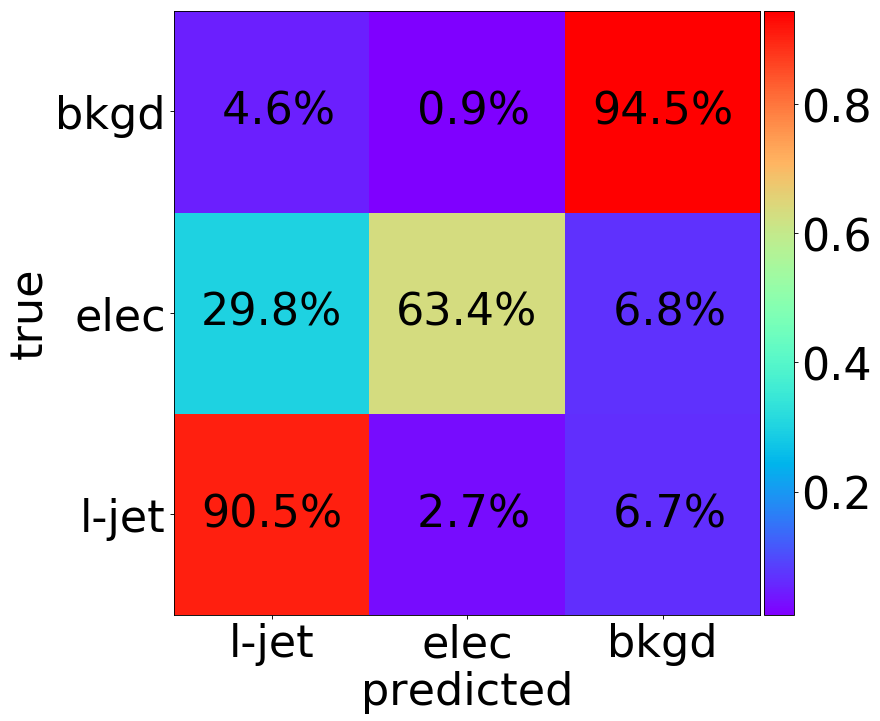

In [10]:
# add extent to figure to help place labels
x_start = 0.0
x_end = len(x_labels_id)
y_start = 0.0
y_end = len(x_labels_id)
extent = [x_start, x_end, y_start, y_end]

def plot_matrix(mat,title=''):
    fig,ax = plt.subplots(figsize=(10,10),dpi=80)
    im = ax.imshow(mat, extent=extent, origin='lower', interpolation='None', cmap='rainbow',aspect='equal')
    ax.set_xticks(np.array(range(nlabels))+0.5)
    ax.set_xticklabels(x_labels_str,fontsize=40)
    ax.set_yticks(np.array(range(nlabels))+0.5)
    ax.set_yticklabels(x_labels_str,fontsize=40)
    ax.set_ylabel('true',fontsize=40)
    ax.set_xlabel('predicted',fontsize=40)
    ax.set_aspect('auto')

    # Add the text
    jump_x = (x_end - x_start) / (2.0 * nlabels)
    jump_y = (y_end - y_start) / (2.0 * nlabels)
    x_positions = np.linspace(start=x_start, stop=x_end, num=nlabels, endpoint=False)
    y_positions = np.linspace(start=y_start, stop=y_end, num=nlabels, endpoint=False)

    for y_index, y in enumerate(y_positions):
        for x_index, x in enumerate(x_positions):
            label = '%4.1f%%' % (mat[y_index, x_index]*100.)
            #label = '%d' % mat[y_index][x_index]
            text_x = x + jump_x
            text_y = y + jump_y
            ax.text(text_x, text_y, label, color='black', ha='center', va='center',fontsize=40)

    cbar = colorbar(im)
    cbar.ax.tick_params(labelsize=40)
    plt.suptitle(title,fontsize=40,ha='center')
    plt.show()

plot_matrix(mat)